In [1]:
from sklearn import datasets
from sklearn import decomposition
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv=datasets.fetch_olivetti_faces()

In [3]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv["data"].shape
#flattened image into single array
#4096 pixels of each image

(400, 4096)

In [6]:
oliv["images"].shape


(400, 64, 64)

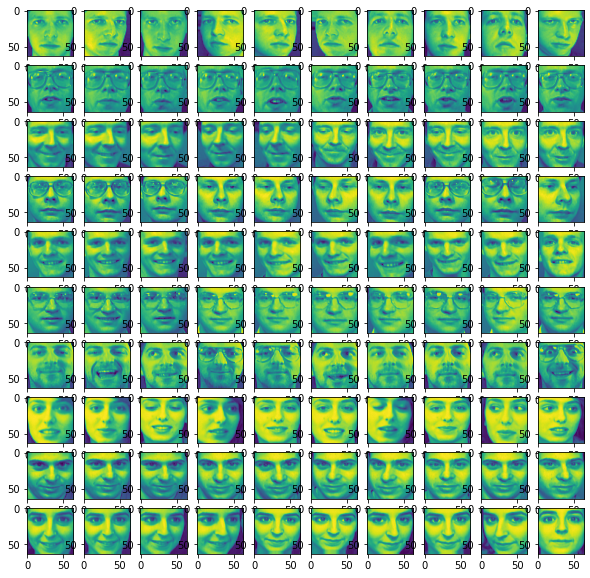

In [7]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1) #position i+1
    ax.imshow(oliv.images[i])
plt.show()

### 40 different people with 10 images each

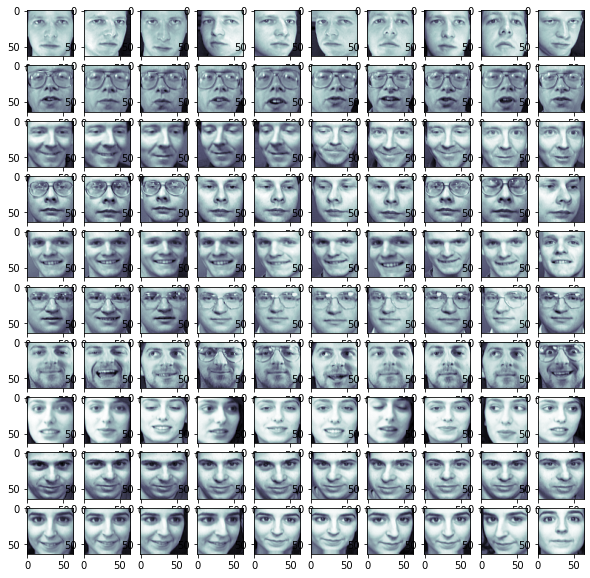

In [8]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1) #position i+1
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [9]:
x=oliv.data
y=oliv.target

In [10]:
pca=PCA()

In [11]:
pca.fit(x)

PCA()

In [12]:
pca.components_
#each component is unit vector in the orig 13 dim space

array([[-0.00419108, -0.00710953, -0.00933608, ...,  0.00018521,
         0.00337971,  0.0031883 ],
       [-0.02859144, -0.03328842, -0.03784656, ...,  0.0296278 ,
         0.02721297,  0.02488895],
       [ 0.00135688, -0.00032583, -0.00019795, ..., -0.01541372,
        -0.01370985, -0.01188347],
       ...,
       [ 0.00223448,  0.02056709,  0.01515884, ..., -0.01273572,
        -0.05849031, -0.07650307],
       [ 0.01714737,  0.02917675, -0.00942522, ...,  0.00159102,
         0.01249354, -0.00815248],
       [-0.00101426,  0.00651786,  0.01664862, ..., -0.01168899,
        -0.01625801, -0.00562718]], dtype=float32)

In [13]:
pca.components_.shape

(400, 4096)

no. of components= min(shape)
#### 400 components n each of length 4096

In [14]:
pca.explained_variance_.sum()

79.11806

In [15]:
k=0
total=pca.explained_variance_.sum()
sum=0
while sum/total <0.95:
    sum+=pca.explained_variance_[k]
    k=k+1
k

123

#### total 4096, pca gave 400 , but now we only need 260 

In [17]:
pca=PCA(n_components=k,whiten =True) #whiten =True works like feature scaling
#affects features after applying pca so they produce better results
transformed_Data=pca.fit_transform(x)
transformed_Data.shape

(400, 123)

In [19]:
x_approx=pca.inverse_transform(transformed_Data)
x_approx.shape

(400, 4096)

In [20]:
x_approx_images=x_approx.reshape((400,64,64))

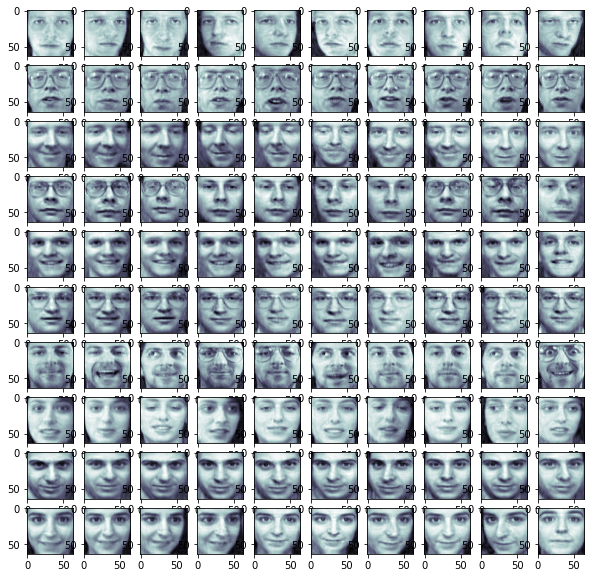

In [24]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1) #position i+1
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [26]:
eigenvec=pca.components_
eigenvec.shape

(123, 4096)

In [27]:
eigenfaces=eigenvec.reshape((123,64,64))

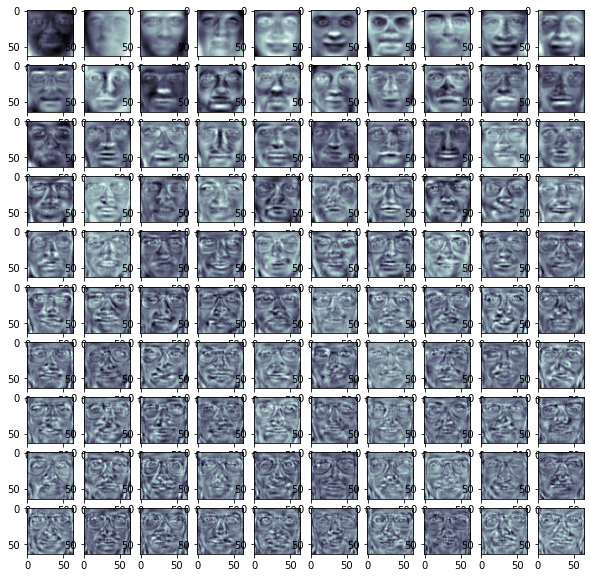

In [28]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1) #position i+1
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

#### each component is focusing on some particular feature of the face(say specs,eyes,etc) 
### 50 features focusing on a particular feature of face 